<a href="https://colab.research.google.com/github/taru4u3/NeuralNetzwerk/blob/main/Cancer_classification_Over_fitting_problem_resolved_with_dropout.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('./cancer_classification.csv')

In [ ]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [ ]:
df.isnull().sum() # no nulls in data

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<Axes: >

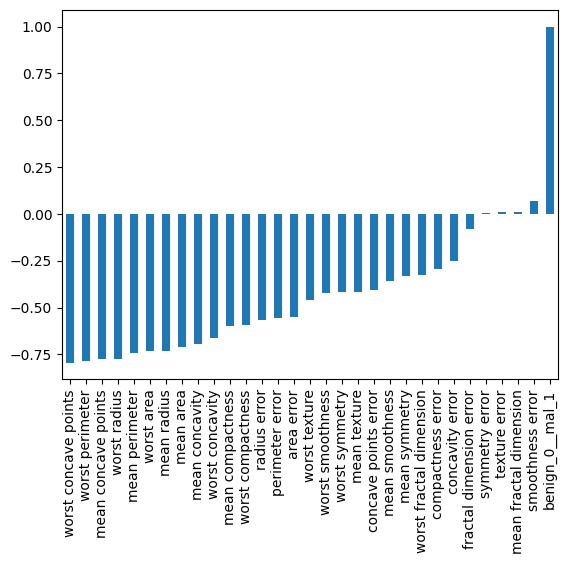

In [ ]:
# Let us check the correlation between different features and our label, better is to plot and go in discussion with business
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

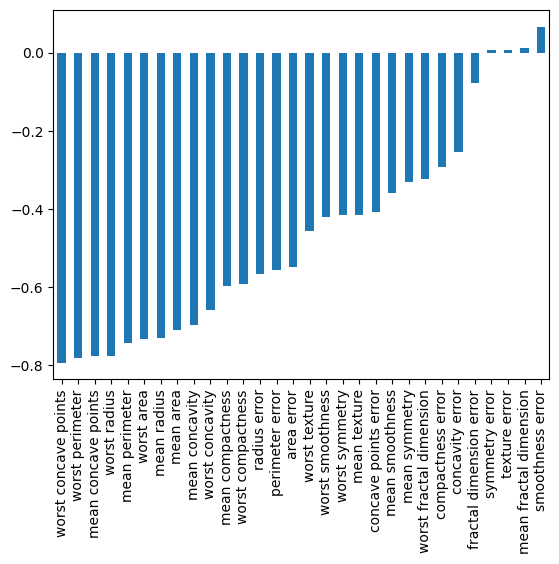

In [ ]:
# Let us remove the label from above plot
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

What we see from above is many features have -ve correlation with our label, so the model should work good for us

<Axes: xlabel='benign_0__mal_1', ylabel='smoothness error'>

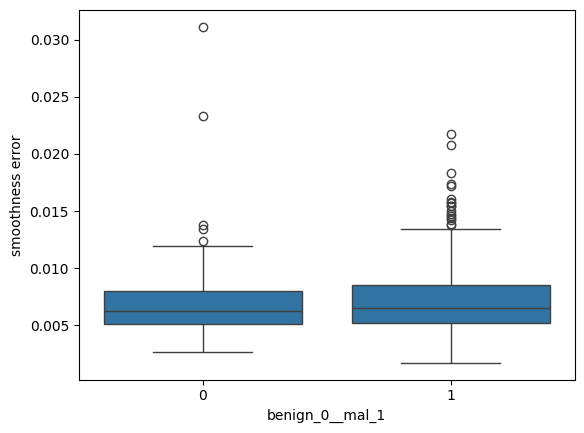

In [ ]:
sns.boxplot(x='benign_0__mal_1',y='smoothness error', data=df)

As we dont have any null values, or any non numeric features, so we dont need explicit feature engineering . Let us begin with data splitting and Modelling

In [ ]:
# use .values to convert DF into array as needed by NN
X= df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Let us scale the data using minmax scaler. Note only the training data should be fitted not test data. test data shld only be transformed

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train,y_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu')) # 30 features hence input layer = 30
model.add(Dense(15,activation='relu')) # hidden layer = 15 to keep it small
model.add(Dense(1,activation = 'sigmoid')) # output layer , sigmoid so that we get the probability of cancer being in one class over other. Like logistic regression problem
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs = 600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6941 - val_loss: 0.6759
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6602 - val_loss: 0.6416
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6293 - val_loss: 0.6055
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5932 - val_loss: 0.5637
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5499 - val_loss: 0.5168
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5018 - val_loss: 0.4654
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4518 - val_loss: 0.4150
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4039 - val_loss: 0.3648
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3585 - val_loss: 0.3260
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3266 - val_loss: 0.2924
Epoch 11

In [ ]:
loss= pd.DataFrame(model.history.history)

In [ ]:
loss.head()

,loss,val_loss
0,0.694061,0.675946
1,0.660209,0.641607
2,0.629342,0.605502
3,0.593176,0.563677
4,0.549862,0.516778


<Axes: >

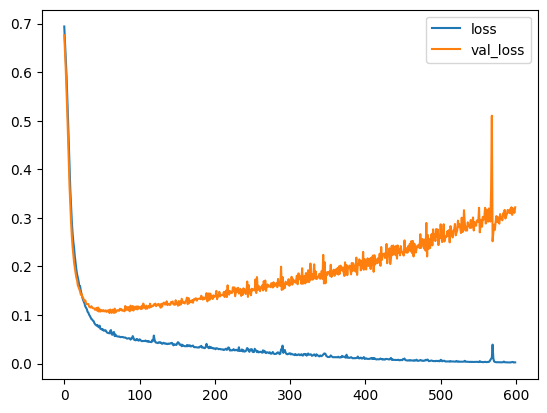

In [ ]:
loss.plot()